# Unsupervised Learning

The vast majority of data in unlabelled: we have the input features **X**, but we do not have the label **y**. Unsupervised learning algorithms exploits the unlabelled data.

**Clustering**:
The goal is to group similar instances into *clusters*.

**Anomaly Detection**:
The objective is to learn what *normal* data looks like, and then use that to detect abnormal instances, such as defective items on a production line or trend in a time series.

**Density Estimation**:
This is the task of estimating the *probability density function (PDF)* of the random process that generated teh dataset.

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Clustering
Clustering is a task of identifying similar instances and assigning them to *clusters*, or groups of similar instances.

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


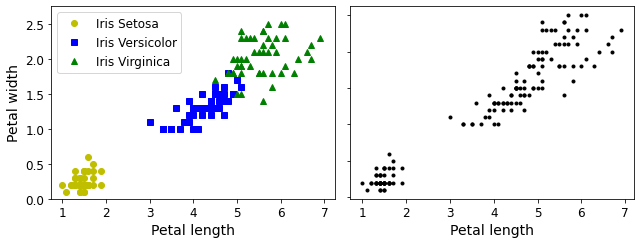

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)

plt.axis([0.75, 7.25, 0, 2.75])
plt.plot(X[(y == 0), 2], X[(y == 0), 3], 'yo', label='Iris Setosa')
plt.plot(X[(y == 1), 2], X[(y == 1), 3], 'bs', label='Iris Versicolor')
plt.plot(X[(y == 2), 2], X[(y == 2), 3], 'g^', label='Iris Virginica')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left', fontsize=12)


plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")

plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [4]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)
y_pred = gm.predict(X)

mapping = np.array([1, 2, 0])

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

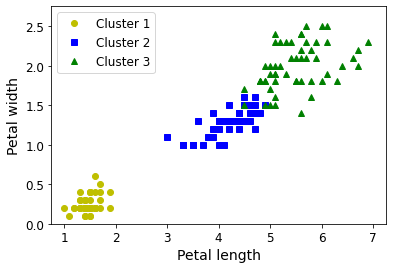

In [5]:
plt.axis([0.75, 7.25, 0, 2.75])
plt.plot(X[(y_pred == 0), 2], X[(y_pred == 0), 3], 'yo', label='Cluster 1')
plt.plot(X[(y_pred == 1), 2], X[(y_pred == 1), 3], 'bs', label='Cluster 2')
plt.plot(X[(y_pred == 2), 2], X[(y_pred == 2), 3], 'g^', label='Cluster 3')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left', fontsize=12)

plt.show()

In [6]:
np.sum(y_pred==y)

145

In [7]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

### K-means

Generating some blobs:

In [8]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1],  c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure bob_plots


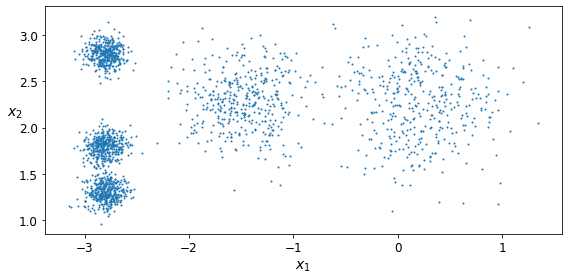

In [10]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

save_fig('bob_plots')
plt.show()

In [11]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

Note that the KMeans instance preserves a copy of the labels of the instances it was trained on. Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to:

In [12]:
y_pred is kmeans.labels_

True

In [13]:
# get centroids
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [14]:
X_new = np.array([[0,2], [3,2], [-3,3], [-3, 2.5]])

kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

Plotting the decision boundaries, we get a Voronoi tessellation, where each centroid is represented with an X.

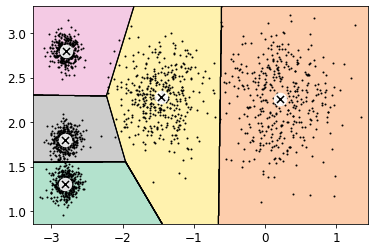

In [26]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids():
    pass

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='o', s=30, linewidths=8,
            color='w', zorder=10, alpha=0.9)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=50, linewidths=50,
            color='k', zorder=11, alpha=1)

plt.show()

The vast majority of instances were correctly labelled, but a few were mislabelled, especially near the boundaries. This is due to KMeans not behaving very well: as clusters are of different sizes and it tries to assign a cluster based on the distance to centroid.
This is called **hard clustering**.

Instead of assigning each instance to a cluster, it can be useful o give each instance a score per cluster, which is called **soft clustering.** The score can be distance between the instance and centroid; conversely, it can be a simlarity score (or affinity), such as Gaussian Radial Basis Function.

In [28]:
# The transform() method measures the distance from each instance to every centroid.

kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

### The K-Means Algorithm